# Tempo de Processamento dos Algoritmos de Beamforming 

Esse jupyter tem como objetivo usar as classes de simulação de array de microfones e bemaformers pra contar o tempo de processamento desses algoritmos em diferentes SNRs.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/home/dimi/Programming/IC2019/DOA/Python/")
from SimularArrayMicrofonesClass import SimularArrayMicrofones
from GeneralizedSidelobeCancellerClass import GeneralizedSidelobeCanceller

### Setando parâmetros iniciais e funções

In [ ]:
# RESPEAKER INCLINADO
coordenadasMics = np.array([
    [0.0000, 0.00000, 0.00000],
    [0.0000, 0.04137, 0.04137],
    [0.0585, 0.04137, 0.04137],
    [0.0585, 0.00000, 0.00000]
])

In [ ]:
def calcularEnerigaRuidoDadoSNR(snrDesejada, energiaSinal):
    return energiaSinal/(10**(snrDesejada/10))

### Começando

In [ ]:
# PARAMETROS INICIAIS
caminho   = "/home/dimi/Downloads/Datasets/SESA/SESA_Normalizado/test/"
rangeSNRs = np.arange(-10, 31, 5)

# CADA LINHA UM AUDIO E CADA COLUNA UMA SNR
matrizResultadosSemBeamforming = []
matrizResultadosDelaySum       = []
matrizResultadosGSC            = []

# PARA CADA ARQUIVO NA PASTA 
arrayArquivos = os.listdir(caminho)
for i, arquivo in enumerate(arrayArquivos):
    
    linhaSemBeamforming = []
    linhaDelaySum       = []
    linhaGSC            = []
    
    # PARA CADA SNR
    for snrAtual in rangeSNRs:
        
        # CALCULO A ENERGIA DO RUIDO NECESSARIA PARA QUE SEJA DESSA SNR
        energiaRuido = calcularEnerigaRuidoDadoSNR(snrAtual, 1)
        
        # SIMULO UM ARRAY DE MICROFONES COM ANGULOS ALEATORIOS
        objSimularArrayMics = SimularArrayMicrofones(caminho+arquivo, energiaRuido=energiaRuido, normalizarEnergia=True, coordenadasMics=coordenadasMics)
        arraySinaisSimulados, __, __ = objSimularArrayMics.obterResultado()
        
        # RODO OS BEAMFORMINGS
        objBeamforming = GeneralizedSidelobeCanceller(arraySinaisOriginais=arraySinaisSimulados)
        
        # OBTENHO E ARMAZENO O RESULTADO
        linhaSemBeamforming.append(objBeamforming.tempoProcessamentoSemBeamforming)
        linhaDelaySum.append(objBeamforming.tempoProcessamentoDelaySum)
        linhaGSC.append(objBeamforming.tempoProcessamentoGSC)
        
    # AGORA QUE JA TENHO OS RESULTADOS PRA VARIAS SNRS, COLOCO AS LINHAS NAS MATRIZES
    matrizResultadosSemBeamforming.append(linhaSemBeamforming)
    matrizResultadosDelaySum.append(linhaDelaySum)
    matrizResultadosGSC.append(linhaGSC)
        
    print("Operações finalizadas: " + str((100*((i+1)/len(arrayArquivos)))) + "%")

### Análise de resultados

#### Média para cada SNR

In [ ]:
print("Sem Beamforming\n")

data = []

medias  = np.mean(matrizResultadosSemBeamforming, axis=0) # media das colunas
desvios = np.std(matrizResultadosSemBeamforming, axis=0) # desvio das colunas

for snrAtual, mediaAtual, desvioAtual in zip(rangeSNRs, medias, desvios):
    print(snrAtual, "dB:\t", mediaAtual, "\t\t+-\t", desvioAtual)

In [ ]:
print("Delay Sum\n")

data = []

medias  = np.mean(matrizResultadosDelaySum, axis=0) # media das colunas
desvios = np.std(matrizResultadosDelaySum, axis=0) # desvio das colunas

for snrAtual, mediaAtual, desvioAtual in zip(rangeSNRs, medias, desvios):
    print(snrAtual, "dB:\t", mediaAtual, "\t\t+-\t", desvioAtual)

In [ ]:
print("GSC\n")

data = []

medias  = np.mean(matrizResultadosGSC, axis=0) # media das colunas
desvios = np.std(matrizResultadosGSC, axis=0) # desvio das colunas

for snrAtual, mediaAtual, desvioAtual in zip(rangeSNRs, medias, desvios):
    print(snrAtual, "dB:\t", mediaAtual, "\t+-\t", desvioAtual)

#### Média geral para todos os arquivos e SNRs

In [ ]:
print("Sem Beamfomring:", np.mean(matrizResultadosSemBeamforming), "\t+-", np.std(matrizResultadosSemBeamforming))
print("Delay Sum:      ", np.mean(matrizResultadosDelaySum), "\t+-", np.std(matrizResultadosDelaySum))
print("GSC:            ", np.mean(matrizResultadosGSC), "\t+-", np.std(matrizResultadosGSC))

## Análise com os classificadores

Resultados adiquiridos usando o colab.

In [2]:
caminhoSalvar = "/home/dimi/Programming/IC2019/Artigos/SBrT2020/Imagens/"

In [3]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [12, 6.5], 
          'axes.labelsize': 20,
          'axes.titlesize':22, 
          'font.size': 20,
          'legend.fontsize': 20, 
          'xtick.labelsize': 20, 
          'ytick.labelsize': 20,
          'axes.axisbelow': True
         }

plt.rcParams.update(params)

In [5]:
# TEMPO MEDIO E DESVIO -> MILISEGUNDOS
semBeamfomring      = [2.395, 1.637]
delaySum            = [162.673, 99.988]
GSC                 = [1279.691, 802.714]

KNNOriginal         = [20.29, 5.59]
SVMOriginal         = [8.64, 2.01]
QDAOriginal         = [4.97, 0.47]
LDAOriginal         = [2.57, 0.15]
SGDOriginal         = [2.56, 0.15]
PerceptronOriginal  = [2.55, 0.14]
TreeOriginal        = [2.49, 0.16]

KNNAumentado        = [239.68, 81.87]
SVMAumentado        = [57.18, 18.62]
QDAAumentado        = [4.85, 0.33]
LDAAumentado        = [2.48, 0.13]
SGDAumentado        = [2.47, 0.13]
PerceptronAumentado = [2.47, 0.11]
TreeAumentado       = [2.44, 0.12]

### Treino Original

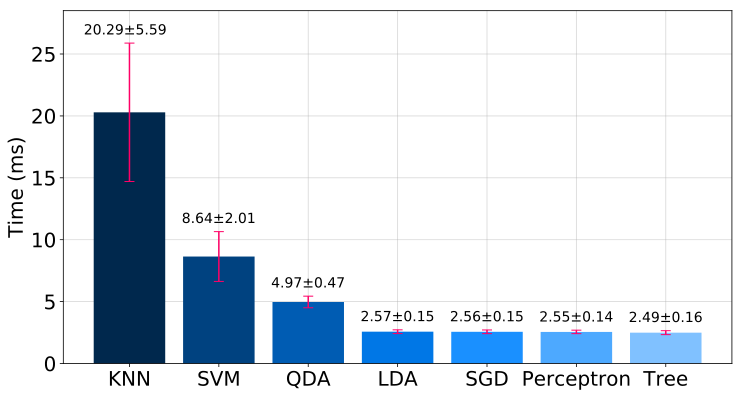

In [6]:
plt.bar(1, KNNOriginal[0]       , color="#00284d")
plt.bar(2, SVMOriginal[0]       , color="#004280")
plt.bar(3, QDAOriginal[0]       , color="#005cb3")
plt.bar(4, LDAOriginal[0]       , color="#0077e6")
plt.bar(5, SGDOriginal[0]       , color="#1a90ff")
plt.bar(6, PerceptronOriginal[0], color="#4da9ff")
plt.bar(7, TreeOriginal[0]      , color="#80c1ff")

plt.errorbar(1, KNNOriginal[0],        yerr=KNNOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(2, SVMOriginal[0],        yerr=SVMOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(3, QDAOriginal[0],        yerr=QDAOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(4, LDAOriginal[0],        yerr=LDAOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(5, SGDOriginal[0],        yerr=SGDOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(6, PerceptronOriginal[0], yerr=PerceptronOriginal[1], capsize=5, color="#ff0066")
plt.errorbar(7, TreeOriginal[0],       yerr=TreeOriginal[1],       capsize=5, color="#ff0066")

plt.text(1 - 0.511, KNNOriginal[0]+KNNOriginal[1]+0.7, str(KNNOriginal[0])+"±"+str(KNNOriginal[1]), fontsize=14)
plt.text(2 - 0.415, SVMOriginal[0]+SVMOriginal[1]+0.7, str(SVMOriginal[0])+"±"+str(SVMOriginal[1]), fontsize=14)
plt.text(3 - 0.415, QDAOriginal[0]+QDAOriginal[1]+0.7, str(QDAOriginal[0])+"±"+str(QDAOriginal[1]), fontsize=14)
plt.text(4 - 0.415, LDAOriginal[0]+LDAOriginal[1]+0.7, str(LDAOriginal[0])+"±"+str(LDAOriginal[1]), fontsize=14)
plt.text(5 - 0.415, SGDOriginal[0]+SGDOriginal[1]+0.7, str(SGDOriginal[0])+"±"+str(SGDOriginal[1]), fontsize=14)
plt.text(6 - 0.415, PerceptronOriginal[0]+PerceptronOriginal[1]+0.7, str(PerceptronOriginal[0])+"±"+str(PerceptronOriginal[1]), fontsize=14)
plt.text(7 - 0.415, TreeOriginal[0]+TreeOriginal[1]+0.7, str(TreeOriginal[0])+"±"+str(TreeOriginal[1]), fontsize=14)

#plt.title("Treino com Dataset Original")
plt.ylabel("Time (ms)")
plt.ylim(0,28.5)
plt.xticks([1,2,3,4,5,6,7],["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"tempoClassificadoresOriginal.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Treino Aumentado

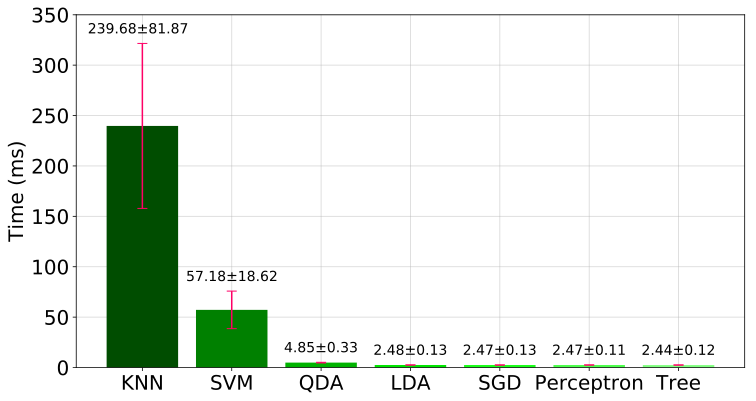

In [7]:
plt.bar(1, KNNAumentado[0]       , color="#004d00")
plt.bar(2, SVMAumentado[0]       , color="#008000")
plt.bar(3, QDAAumentado[0]       , color="#00b300")
plt.bar(4, LDAAumentado[0]       , color="#00e600")
plt.bar(5, SGDAumentado[0]       , color="#1aff1a")
plt.bar(6, PerceptronAumentado[0], color="#4dff4d")
plt.bar(7, TreeAumentado[0]      , color="#80ff80")

plt.errorbar(1, KNNAumentado[0],        yerr=KNNAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(2, SVMAumentado[0],        yerr=SVMAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(3, QDAAumentado[0],        yerr=QDAAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(4, LDAAumentado[0],        yerr=LDAAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(5, SGDAumentado[0],        yerr=SGDAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(6, PerceptronAumentado[0], yerr=PerceptronAumentado[1], capsize=5, color="#ff0066")
plt.errorbar(7, TreeAumentado[0],       yerr=TreeAumentado[1],       capsize=5, color="#ff0066")

plt.text(1 - 0.611, KNNAumentado[0]+KNNAumentado[1]+10, str(KNNAumentado[0])+"±"+str(KNNAumentado[1]), fontsize=14)
plt.text(2 - 0.511, SVMAumentado[0]+SVMAumentado[1]+10, str(SVMAumentado[0])+"±"+str(SVMAumentado[1]), fontsize=14)
plt.text(3 - 0.415, QDAAumentado[0]+QDAAumentado[1]+10, str(QDAAumentado[0])+"±"+str(QDAAumentado[1]), fontsize=14)
plt.text(4 - 0.415, LDAAumentado[0]+LDAAumentado[1]+10, str(LDAAumentado[0])+"±"+str(LDAAumentado[1]), fontsize=14)
plt.text(5 - 0.415, SGDAumentado[0]+SGDAumentado[1]+10, str(SGDAumentado[0])+"±"+str(SGDAumentado[1]), fontsize=14)
plt.text(6 - 0.415, PerceptronAumentado[0]+PerceptronAumentado[1]+10, str(PerceptronAumentado[0])+"±"+str(PerceptronAumentado[1]), fontsize=14)
plt.text(7 - 0.415, TreeAumentado[0]+TreeAumentado[1]+10, str(TreeAumentado[0])+"±"+str(TreeAumentado[1]), fontsize=14)

#plt.title("Treino com dataset Aumentado")
plt.ylabel("Time (ms)")
plt.ylim(0,350)
plt.xticks([1,2,3,4,5,6,7],["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"tempoClassificadoresAumentado.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Escala logarítmica em Y

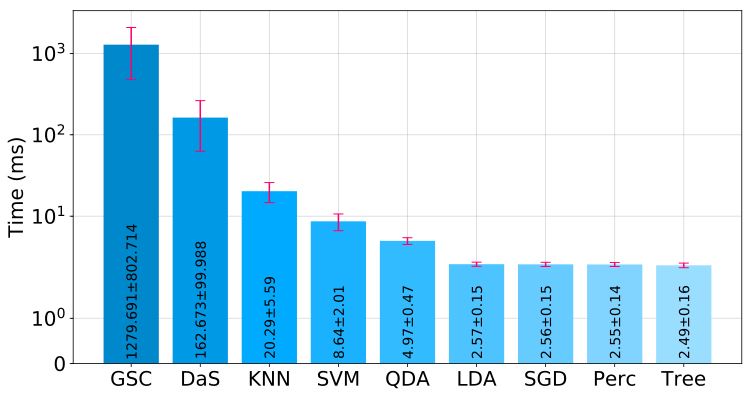

In [8]:
paleta = ["#99ddff", "#80d4ff", "#66ccff", "#4dc3ff", "#33bbff", "#1ab2ff", "#00aaff", "#0099e6", "#0088cc"]

plt.bar(1, GSC[0]               , color=paleta[8])
plt.bar(2, delaySum[0]          , color=paleta[7])
plt.bar(3, KNNOriginal[0]       , color=paleta[6])
plt.bar(4, SVMOriginal[0]       , color=paleta[5])
plt.bar(5, QDAOriginal[0]       , color=paleta[4])
plt.bar(6, LDAOriginal[0]       , color=paleta[3])
plt.bar(7, SGDOriginal[0]       , color=paleta[2])
plt.bar(8, PerceptronOriginal[0], color=paleta[1])
plt.bar(9, TreeOriginal[0]      , color=paleta[0])

plt.errorbar(1, GSC[0],                yerr=GSC[1],                capsize=5, color="#ff0066")
plt.errorbar(2, delaySum[0],           yerr=delaySum[1],           capsize=5, color="#ff0066")
plt.errorbar(3, KNNOriginal[0],        yerr=KNNOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(4, SVMOriginal[0],        yerr=SVMOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(5, QDAOriginal[0],        yerr=QDAOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(6, LDAOriginal[0],        yerr=LDAOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(7, SGDOriginal[0],        yerr=SGDOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(8, PerceptronOriginal[0], yerr=PerceptronOriginal[1], capsize=5, color="#ff0066")
plt.errorbar(9, TreeOriginal[0],       yerr=TreeOriginal[1],       capsize=5, color="#ff0066")

plt.text(1 - 0.075, 6.0, str(GSC[0])+"±"+str(GSC[1]), rotation=90, fontsize=14)
plt.text(2 - 0.075, 3.7, str(delaySum[0])+"±"+str(delaySum[1]), rotation=90, fontsize=14)
plt.text(3 - 0.075, 1.7, str(KNNOriginal[0])+"±"+str(KNNOriginal[1]), rotation=90, fontsize=14)
plt.text(4 - 0.075, 1.5, str(SVMOriginal[0])+"±"+str(SVMOriginal[1]), rotation=90, fontsize=14)
plt.text(5 - 0.075, 1.5, str(QDAOriginal[0])+"±"+str(QDAOriginal[1]), rotation=90, fontsize=14)
plt.text(6 - 0.075, 1.5, str(LDAOriginal[0])+"±"+str(LDAOriginal[1]), rotation=90, fontsize=14)
plt.text(7 - 0.075, 1.5, str(SGDOriginal[0])+"±"+str(SGDOriginal[1]), rotation=90, fontsize=14)
plt.text(8 - 0.075, 1.5, str(PerceptronOriginal[0])+"±"+str(PerceptronOriginal[1]), rotation=90, fontsize=14)
plt.text(9 - 0.075, 1.5, str(TreeOriginal[0])+"±"+str(TreeOriginal[1]), rotation=90, fontsize=14)

#plt.title("Treino com Dataset Original")
plt.ylabel("Time (ms)")
plt.yscale("symlog")
plt.xticks([1,2,3,4,5,6,7,8,9],["GSC","DaS","KNN","SVM","QDA","LDA","SGD","Perc","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"tempoClassificadoresOriginalLOG.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

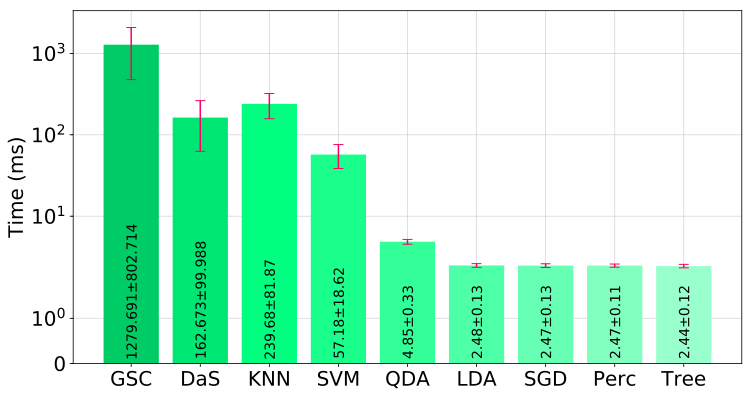

In [9]:
#paleta = ["#e6b3b3", "#df9f9f", "#d98c8c", "#d27979", "#cc6666", "#c65353", "#bf4040", "#ac3939", "#993333"]
paleta = ["#99ffcc", "#80ffbf", "#66ffb3", "#4dffa6", "#33ff99", "#1aff8c", "#00ff80", "#00e673", "#00cc66"]

plt.bar(1, GSC[0]                , color=paleta[8])
plt.bar(2, delaySum[0]           , color=paleta[7])
plt.bar(3, KNNAumentado[0]       , color=paleta[6])
plt.bar(4, SVMAumentado[0]       , color=paleta[5])
plt.bar(5, QDAAumentado[0]       , color=paleta[4])
plt.bar(6, LDAAumentado[0]       , color=paleta[3])
plt.bar(7, SGDAumentado[0]       , color=paleta[2])
plt.bar(8, PerceptronAumentado[0], color=paleta[1])
plt.bar(9, TreeAumentado[0]      , color=paleta[0])

plt.errorbar(1, GSC[0],                yerr=GSC[1],                capsize=5, color="#ff0066")
plt.errorbar(2, delaySum[0],           yerr=delaySum[1],           capsize=5, color="#ff0066")
plt.errorbar(3, KNNAumentado[0],        yerr=KNNAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(4, SVMAumentado[0],        yerr=SVMAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(5, QDAAumentado[0],        yerr=QDAAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(6, LDAAumentado[0],        yerr=LDAAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(7, SGDAumentado[0],        yerr=SGDAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(8, PerceptronAumentado[0], yerr=PerceptronAumentado[1], capsize=5, color="#ff0066")
plt.errorbar(9, TreeAumentado[0],       yerr=TreeAumentado[1],       capsize=5, color="#ff0066")

plt.text(1 - 0.075, 6.0, str(GSC[0])+"±"+str(GSC[1]), rotation=90, fontsize=14)
plt.text(2 - 0.075, 3.7, str(delaySum[0])+"±"+str(delaySum[1]), rotation=90, fontsize=14)
plt.text(3 - 0.075, 2.2, str(KNNAumentado[0])+"±"+str(KNNAumentado[1]), rotation=90, fontsize=14)
plt.text(4 - 0.075, 1.9, str(SVMAumentado[0])+"±"+str(SVMAumentado[1]), rotation=90, fontsize=14)
plt.text(5 - 0.075, 1.5, str(QDAAumentado[0])+"±"+str(QDAAumentado[1]), rotation=90, fontsize=14)
plt.text(6 - 0.075, 1.5, str(LDAAumentado[0])+"±"+str(LDAAumentado[1]), rotation=90, fontsize=14)
plt.text(7 - 0.075, 1.5, str(SGDAumentado[0])+"±"+str(SGDAumentado[1]), rotation=90, fontsize=14)
plt.text(8 - 0.075, 1.5, str(PerceptronAumentado[0])+"±"+str(PerceptronAumentado[1]), rotation=90, fontsize=14)
plt.text(9 - 0.075, 1.5, str(TreeAumentado[0])+"±"+str(TreeAumentado[1]), rotation=90, fontsize=14)

#plt.title("Treino com Dataset Aumentado")
plt.ylabel("Time (ms)")
plt.yscale("symlog")
plt.xticks([1,2,3,4,5,6,7,8,9],["GSC","DaS","KNN","SVM","QDA","LDA","SGD","Perc","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"tempoClassificadoresAumentadoLOG.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Tudo junto

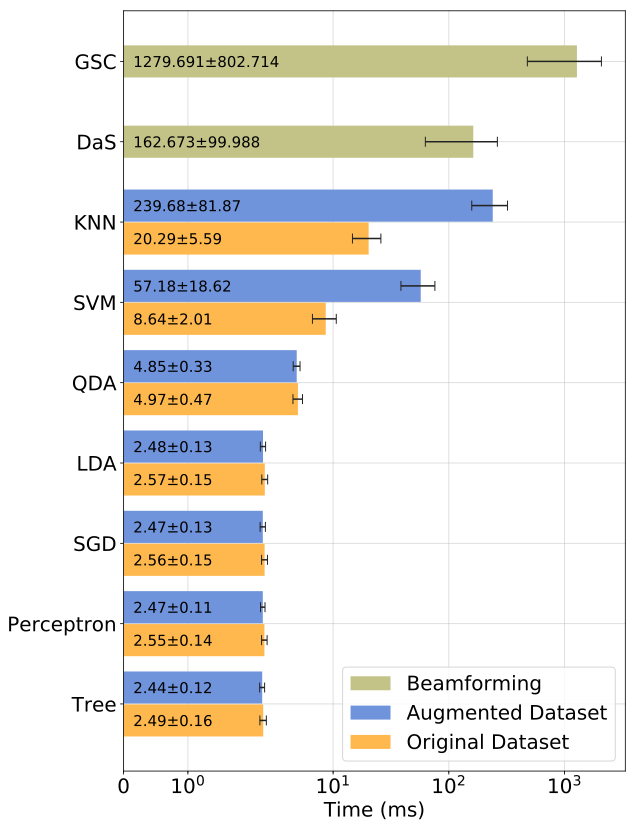

In [10]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [9, 14], 
          'axes.labelsize': 20,
          'axes.titlesize':22, 
          'font.size': 20,
          'legend.fontsize': 20, 
          'xtick.labelsize': 20, 
          'ytick.labelsize': 20,
          'axes.axisbelow': True
         }

plt.rcParams.update(params)

corBeamforming = "#c3c388"
corAumentado   = "#7094db"
corOriginal    = "#ffb84d"
ajusteBarra    = 0.41
passo          = 2
ajusteTexto    = 0.14
fonteTexto     = 15

plt.barh(8*passo, GSC[0], color=corBeamforming, label="Beamforming")
plt.barh(7*passo, delaySum[0], color=corBeamforming)
plt.barh(6*passo+ajusteBarra, KNNAumentado[0], color=corAumentado, label="Augmented Dataset")
plt.barh(6*passo-ajusteBarra, KNNOriginal[0], color=corOriginal, label="Original Dataset")
plt.barh(5*passo+ajusteBarra, SVMAumentado[0], color=corAumentado)
plt.barh(5*passo-ajusteBarra, SVMOriginal[0], color=corOriginal)
plt.barh(4*passo+ajusteBarra, QDAAumentado[0], color=corAumentado)
plt.barh(4*passo-ajusteBarra, QDAOriginal[0], color=corOriginal)
plt.barh(3*passo+ajusteBarra, LDAAumentado[0], color=corAumentado)
plt.barh(3*passo-ajusteBarra, LDAOriginal[0], color=corOriginal)
plt.barh(2*passo+ajusteBarra, SGDAumentado[0], color=corAumentado)
plt.barh(2*passo-ajusteBarra, SGDOriginal[0], color=corOriginal)
plt.barh(1*passo+ajusteBarra, PerceptronAumentado[0], color=corAumentado)
plt.barh(1*passo-ajusteBarra, PerceptronOriginal[0], color=corOriginal)
plt.barh(0*passo+ajusteBarra, TreeAumentado[0], color=corAumentado)
plt.barh(0*passo-ajusteBarra, TreeOriginal[0], color=corOriginal)

plt.errorbar(GSC[0], 8*passo, xerr=GSC[1], capsize=5, color="#222222")
plt.errorbar(delaySum[0], 7*passo, xerr=delaySum[1], capsize=5, color="#222222")
plt.errorbar(KNNAumentado[0], 6*passo+ajusteBarra, xerr=KNNAumentado[1], capsize=5, color="#222222")
plt.errorbar(KNNOriginal[0], 6*passo-ajusteBarra, xerr=KNNOriginal[1], capsize=5, color="#222222")
plt.errorbar(SVMAumentado[0], 5*passo+ajusteBarra, xerr=SVMAumentado[1], capsize=5, color="#222222")
plt.errorbar(SVMOriginal[0], 5*passo-ajusteBarra, xerr=SVMOriginal[1], capsize=5, color="#222222")
plt.errorbar(QDAAumentado[0], 4*passo+ajusteBarra, xerr=QDAAumentado[1], capsize=5, color="#222222")
plt.errorbar(QDAOriginal[0], 4*passo-ajusteBarra, xerr=QDAOriginal[1], capsize=5, color="#222222")
plt.errorbar(LDAAumentado[0], 3*passo+ajusteBarra, xerr=LDAAumentado[1], capsize=5, color="#222222")
plt.errorbar(LDAOriginal[0], 3*passo-ajusteBarra, xerr=LDAOriginal[1], capsize=5, color="#222222")
plt.errorbar(SGDAumentado[0], 2*passo+ajusteBarra, xerr=SGDAumentado[1], capsize=5, color="#222222")
plt.errorbar(SGDOriginal[0], 2*passo-ajusteBarra, xerr=SGDOriginal[1], capsize=5, color="#222222")
plt.errorbar(PerceptronAumentado[0], 1*passo+ajusteBarra, xerr=PerceptronAumentado[1], capsize=5, color="#222222")
plt.errorbar(PerceptronOriginal[0], 1*passo-ajusteBarra, xerr=PerceptronOriginal[1], capsize=5, color="#222222")
plt.errorbar(TreeAumentado[0], 0*passo+ajusteBarra, xerr=TreeAumentado[1], capsize=5, color="#222222")
plt.errorbar(TreeOriginal[0], 0*passo-ajusteBarra, xerr=TreeOriginal[1], capsize=5, color="#222222")

plt.text(0.15, 8*passo-ajusteTexto, str(GSC[0])+"±"+str(GSC[1]), fontsize=fonteTexto)
plt.text(0.15, 7*passo-ajusteTexto, str(delaySum[0])+"±"+str(delaySum[1]), fontsize=fonteTexto)
plt.text(0.15, 6*passo+ajusteBarra-ajusteTexto, str(KNNAumentado[0])+"±"+str(KNNAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 6*passo-ajusteBarra-ajusteTexto, str(KNNOriginal[0])+"±"+str(KNNOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 5*passo+ajusteBarra-ajusteTexto, str(SVMAumentado[0])+"±"+str(SVMAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 5*passo-ajusteBarra-ajusteTexto, str(SVMOriginal[0])+"±"+str(SVMOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 4*passo+ajusteBarra-ajusteTexto, str(QDAAumentado[0])+"±"+str(QDAAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 4*passo-ajusteBarra-ajusteTexto, str(QDAOriginal[0])+"±"+str(QDAOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 3*passo+ajusteBarra-ajusteTexto, str(LDAAumentado[0])+"±"+str(LDAAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 3*passo-ajusteBarra-ajusteTexto, str(LDAOriginal[0])+"±"+str(LDAOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 2*passo+ajusteBarra-ajusteTexto, str(SGDAumentado[0])+"±"+str(SGDAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 2*passo-ajusteBarra-ajusteTexto, str(SGDOriginal[0])+"±"+str(SGDOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 1*passo+ajusteBarra-ajusteTexto, str(PerceptronAumentado[0])+"±"+str(PerceptronAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 1*passo-ajusteBarra-ajusteTexto, str(PerceptronOriginal[0])+"±"+str(PerceptronOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 0*passo+ajusteBarra-ajusteTexto, str(TreeAumentado[0])+"±"+str(TreeAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 0*passo-ajusteBarra-ajusteTexto, str(TreeOriginal[0])+"±"+str(TreeOriginal[1]), fontsize=fonteTexto)

plt.legend()
plt.xlabel("Time (ms)")
plt.xscale("symlog")
plt.yticks([8*passo,7*passo,6*passo,5*passo,4*passo,3*passo,2*passo,1*passo,0*passo], ["GSC","DaS","KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"tempoTodosAlgoritmos.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Soma do DaS com os classificadores

In [11]:
somaDaSeKNNAumentado        = [delaySum[0] + KNNAumentado[0], ((delaySum[1])**2+(KNNAumentado[1])**2)**(1/2)]
somaDaSeSVMAumentado        = [delaySum[0] + SVMAumentado[0], ((delaySum[1])**2+(SVMAumentado[1])**2)**(1/2)]
somaDaSeQDAAumentado        = [delaySum[0] + QDAAumentado[0], ((delaySum[1])**2+(QDAAumentado[1])**2)**(1/2)]
somaDaSeLDAAumentado        = [delaySum[0] + LDAAumentado[0], ((delaySum[1])**2+(LDAAumentado[1])**2)**(1/2)]
somaDaSeSGDAumentado        = [delaySum[0] + SGDAumentado[0], ((delaySum[1])**2+(SGDAumentado[1])**2)**(1/2)]
somaDaSePerceptronAumentado = [delaySum[0] + PerceptronAumentado[0], ((delaySum[1])**2+(PerceptronAumentado[1])**2)**(1/2)]
somaDaSeTreeAumentado       = [delaySum[0] + TreeAumentado[0], ((delaySum[1])**2+(TreeAumentado[1])**2)**(1/2)]

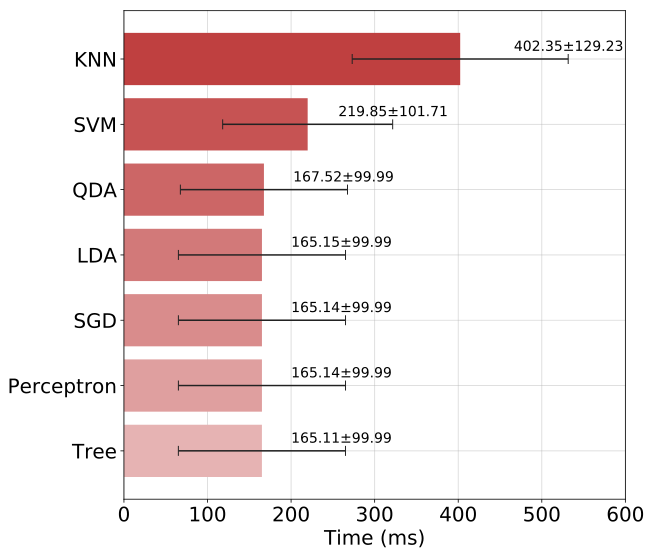

In [12]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [9, 9], 
          'axes.labelsize': 20,
          'axes.titlesize':22, 
          'font.size': 20,
          'legend.fontsize': 20, 
          'xtick.labelsize': 20, 
          'ytick.labelsize': 20,
          'axes.axisbelow': True
         }
plt.rcParams.update(params)

paleta = ["#e6b3b3", "#df9f9f", "#d98c8c", "#d27979", "#cc6666", "#c65353", "#bf4040", "#ac3939", "#993333"]

plt.barh(7, somaDaSeKNNAumentado[0], color=paleta[6])
plt.barh(6, somaDaSeSVMAumentado[0], color=paleta[5])
plt.barh(5, somaDaSeQDAAumentado[0], color=paleta[4])
plt.barh(4, somaDaSeLDAAumentado[0], color=paleta[3])
plt.barh(3, somaDaSeSGDAumentado[0], color=paleta[2])
plt.barh(2, somaDaSePerceptronAumentado[0], color=paleta[1])
plt.barh(1, somaDaSeTreeAumentado[0], color=paleta[0])

plt.errorbar(somaDaSeKNNAumentado[0], 7, xerr=somaDaSeKNNAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeSVMAumentado[0], 6, xerr=somaDaSeSVMAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeQDAAumentado[0], 5, xerr=somaDaSeQDAAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeLDAAumentado[0], 4, xerr=somaDaSeLDAAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeSGDAumentado[0], 3, xerr=somaDaSeSGDAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSePerceptronAumentado[0], 2, xerr=somaDaSePerceptronAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeTreeAumentado[0], 1, xerr=somaDaSeTreeAumentado[1], capsize=5, color="#222222")

plt.text(somaDaSeKNNAumentado[0]+somaDaSeKNNAumentado[1]-65, 7+0.125, '{:.2f}'.format(somaDaSeKNNAumentado[0])+"±"+'{:.2f}'.format(somaDaSeKNNAumentado[1]), fontsize=14)
plt.text(somaDaSeSVMAumentado[0]+somaDaSeSVMAumentado[1]-65, 6+0.125, '{:.2f}'.format(somaDaSeSVMAumentado[0])+"±"+'{:.2f}'.format(somaDaSeSVMAumentado[1]), fontsize=14)
plt.text(somaDaSeQDAAumentado[0]+somaDaSeQDAAumentado[1]-65, 5+0.125, '{:.2f}'.format(somaDaSeQDAAumentado[0])+"±"+'{:.2f}'.format(somaDaSeQDAAumentado[1]), fontsize=14)
plt.text(somaDaSeLDAAumentado[0]+somaDaSeLDAAumentado[1]-65, 4+0.125, '{:.2f}'.format(somaDaSeLDAAumentado[0])+"±"+'{:.2f}'.format(somaDaSeLDAAumentado[1]), fontsize=14)
plt.text(somaDaSeSGDAumentado[0]+somaDaSeSGDAumentado[1]-65, 3+0.125, '{:.2f}'.format(somaDaSeSGDAumentado[0])+"±"+'{:.2f}'.format(somaDaSeSGDAumentado[1]), fontsize=14)
plt.text(somaDaSePerceptronAumentado[0]+somaDaSePerceptronAumentado[1]-65, 2+0.125, '{:.2f}'.format(somaDaSePerceptronAumentado[0])+"±"+'{:.2f}'.format(somaDaSePerceptronAumentado[1]), fontsize=14)
plt.text(somaDaSeTreeAumentado[0]+somaDaSeTreeAumentado[1]-65, 1+0.125, '{:.2f}'.format(somaDaSeTreeAumentado[0])+"±"+'{:.2f}'.format(somaDaSeTreeAumentado[1]), fontsize=14)

plt.xlabel("Time (ms)")
plt.xlim(0,600)
plt.yticks([7,6,5,4,3,2,1],["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"somaDaSeClassificadoresAumentado.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

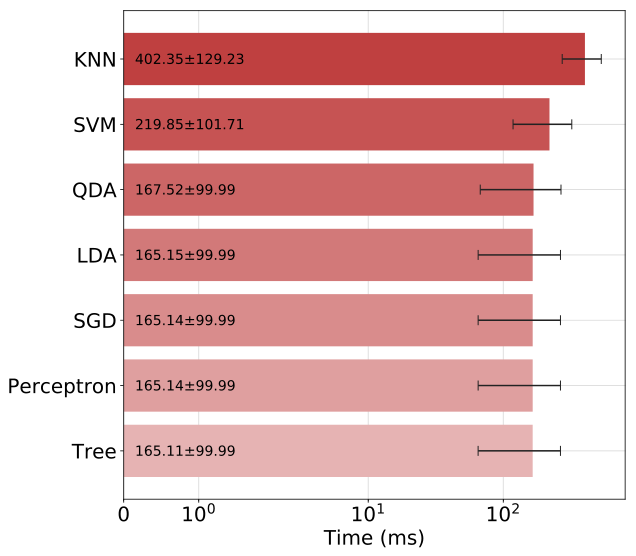

In [13]:
paleta = ["#e6b3b3", "#df9f9f", "#d98c8c", "#d27979", "#cc6666", "#c65353", "#bf4040", "#ac3939", "#993333"]

plt.barh(7, somaDaSeKNNAumentado[0], color=paleta[6])
plt.barh(6, somaDaSeSVMAumentado[0], color=paleta[5])
plt.barh(5, somaDaSeQDAAumentado[0], color=paleta[4])
plt.barh(4, somaDaSeLDAAumentado[0], color=paleta[3])
plt.barh(3, somaDaSeSGDAumentado[0], color=paleta[2])
plt.barh(2, somaDaSePerceptronAumentado[0], color=paleta[1])
plt.barh(1, somaDaSeTreeAumentado[0], color=paleta[0])

plt.errorbar(somaDaSeKNNAumentado[0], 7, xerr=somaDaSeKNNAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeSVMAumentado[0], 6, xerr=somaDaSeSVMAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeQDAAumentado[0], 5, xerr=somaDaSeQDAAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeLDAAumentado[0], 4, xerr=somaDaSeLDAAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeSGDAumentado[0], 3, xerr=somaDaSeSGDAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSePerceptronAumentado[0], 2, xerr=somaDaSePerceptronAumentado[1], capsize=5, color="#222222")
plt.errorbar(somaDaSeTreeAumentado[0], 1, xerr=somaDaSeTreeAumentado[1], capsize=5, color="#222222")

plt.text(0.15, 7-0.075, '{:.2f}'.format(somaDaSeKNNAumentado[0])+"±"+'{:.2f}'.format(somaDaSeKNNAumentado[1]), fontsize=14)
plt.text(0.15, 6-0.075, '{:.2f}'.format(somaDaSeSVMAumentado[0])+"±"+'{:.2f}'.format(somaDaSeSVMAumentado[1]), fontsize=14)
plt.text(0.15, 5-0.075, '{:.2f}'.format(somaDaSeQDAAumentado[0])+"±"+'{:.2f}'.format(somaDaSeQDAAumentado[1]), fontsize=14)
plt.text(0.15, 4-0.075, '{:.2f}'.format(somaDaSeLDAAumentado[0])+"±"+'{:.2f}'.format(somaDaSeLDAAumentado[1]), fontsize=14)
plt.text(0.15, 3-0.075, '{:.2f}'.format(somaDaSeSGDAumentado[0])+"±"+'{:.2f}'.format(somaDaSeSGDAumentado[1]), fontsize=14)
plt.text(0.15, 2-0.075, '{:.2f}'.format(somaDaSePerceptronAumentado[0])+"±"+'{:.2f}'.format(somaDaSePerceptronAumentado[1]), fontsize=14)
plt.text(0.15, 1-0.075, '{:.2f}'.format(somaDaSeTreeAumentado[0])+"±"+'{:.2f}'.format(somaDaSeTreeAumentado[1]), fontsize=14)

plt.xlabel("Time (ms)")
plt.xscale("symlog")
plt.yticks([7,6,5,4,3,2,1],["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"somaDaSeClassificadoresAumentadoLOG.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Cada algoritmo separado, mas de forma diferente

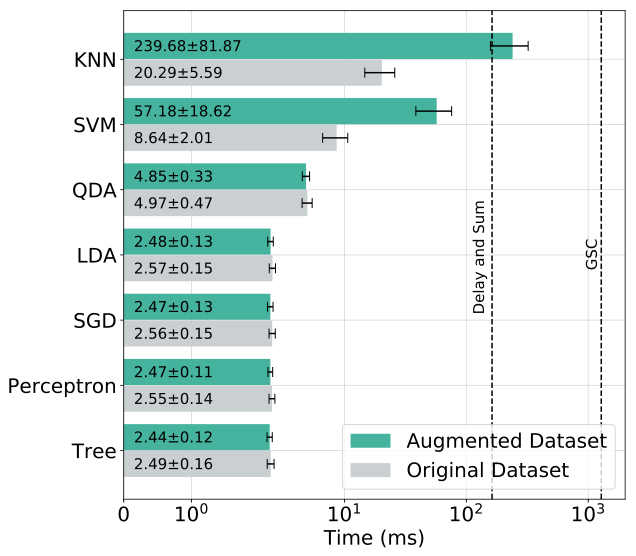

In [14]:
# corAumentado   = "#d27979"
# corOriginal    = "#4da6ff"
# corAumentado   = "tab:green"
# corOriginal    = "tab:grey"
# corAumentado   = None
# corOriginal    = None
corAumentado   = "#45B39D"
corOriginal    = "#CACFD2"
ajusteBarra    = 0.41
passo          = 2
ajusteTexto    = 0.16
fonteTexto     = 15

plt.barh(6*passo+ajusteBarra, KNNAumentado[0], color=corAumentado, label="Augmented Dataset")
plt.barh(6*passo-ajusteBarra, KNNOriginal[0], color=corOriginal, label="Original Dataset")
plt.barh(5*passo+ajusteBarra, SVMAumentado[0], color=corAumentado)
plt.barh(5*passo-ajusteBarra, SVMOriginal[0], color=corOriginal)
plt.barh(4*passo+ajusteBarra, QDAAumentado[0], color=corAumentado)
plt.barh(4*passo-ajusteBarra, QDAOriginal[0], color=corOriginal)
plt.barh(3*passo+ajusteBarra, LDAAumentado[0], color=corAumentado)
plt.barh(3*passo-ajusteBarra, LDAOriginal[0], color=corOriginal)
plt.barh(2*passo+ajusteBarra, SGDAumentado[0], color=corAumentado)
plt.barh(2*passo-ajusteBarra, SGDOriginal[0], color=corOriginal)
plt.barh(1*passo+ajusteBarra, PerceptronAumentado[0], color=corAumentado)
plt.barh(1*passo-ajusteBarra, PerceptronOriginal[0], color=corOriginal)
plt.barh(0*passo+ajusteBarra, TreeAumentado[0], color=corAumentado)
plt.barh(0*passo-ajusteBarra, TreeOriginal[0], color=corOriginal)

plt.errorbar(KNNAumentado[0], 6*passo+ajusteBarra, xerr=KNNAumentado[1], capsize=5, color="black")
plt.errorbar(KNNOriginal[0], 6*passo-ajusteBarra, xerr=KNNOriginal[1], capsize=5, color="black")
plt.errorbar(SVMAumentado[0], 5*passo+ajusteBarra, xerr=SVMAumentado[1], capsize=5, color="black")
plt.errorbar(SVMOriginal[0], 5*passo-ajusteBarra, xerr=SVMOriginal[1], capsize=5, color="black")
plt.errorbar(QDAAumentado[0], 4*passo+ajusteBarra, xerr=QDAAumentado[1], capsize=5, color="black")
plt.errorbar(QDAOriginal[0], 4*passo-ajusteBarra, xerr=QDAOriginal[1], capsize=5, color="black")
plt.errorbar(LDAAumentado[0], 3*passo+ajusteBarra, xerr=LDAAumentado[1], capsize=5, color="black")
plt.errorbar(LDAOriginal[0], 3*passo-ajusteBarra, xerr=LDAOriginal[1], capsize=5, color="black")
plt.errorbar(SGDAumentado[0], 2*passo+ajusteBarra, xerr=SGDAumentado[1], capsize=5, color="black")
plt.errorbar(SGDOriginal[0], 2*passo-ajusteBarra, xerr=SGDOriginal[1], capsize=5, color="black")
plt.errorbar(PerceptronAumentado[0], 1*passo+ajusteBarra, xerr=PerceptronAumentado[1], capsize=5, color="black")
plt.errorbar(PerceptronOriginal[0], 1*passo-ajusteBarra, xerr=PerceptronOriginal[1], capsize=5, color="black")
plt.errorbar(TreeAumentado[0], 0*passo+ajusteBarra, xerr=TreeAumentado[1], capsize=5, color="black")
plt.errorbar(TreeOriginal[0], 0*passo-ajusteBarra, xerr=TreeOriginal[1], capsize=5, color="black")

plt.text(0.15, 6*passo+ajusteBarra-ajusteTexto, str(KNNAumentado[0])+"±"+str(KNNAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 6*passo-ajusteBarra-ajusteTexto, str(KNNOriginal[0])+"±"+str(KNNOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 5*passo+ajusteBarra-ajusteTexto, str(SVMAumentado[0])+"±"+str(SVMAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 5*passo-ajusteBarra-ajusteTexto, str(SVMOriginal[0])+"±"+str(SVMOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 4*passo+ajusteBarra-ajusteTexto, str(QDAAumentado[0])+"±"+str(QDAAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 4*passo-ajusteBarra-ajusteTexto, str(QDAOriginal[0])+"±"+str(QDAOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 3*passo+ajusteBarra-ajusteTexto, str(LDAAumentado[0])+"±"+str(LDAAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 3*passo-ajusteBarra-ajusteTexto, str(LDAOriginal[0])+"±"+str(LDAOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 2*passo+ajusteBarra-ajusteTexto, str(SGDAumentado[0])+"±"+str(SGDAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 2*passo-ajusteBarra-ajusteTexto, str(SGDOriginal[0])+"±"+str(SGDOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 1*passo+ajusteBarra-ajusteTexto, str(PerceptronAumentado[0])+"±"+str(PerceptronAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 1*passo-ajusteBarra-ajusteTexto, str(PerceptronOriginal[0])+"±"+str(PerceptronOriginal[1]), fontsize=fonteTexto)
plt.text(0.15, 0*passo+ajusteBarra-ajusteTexto, str(TreeAumentado[0])+"±"+str(TreeAumentado[1]), fontsize=fonteTexto)
plt.text(0.15, 0*passo-ajusteBarra-ajusteTexto, str(TreeOriginal[0])+"±"+str(TreeOriginal[1]), fontsize=fonteTexto)

plt.axvline(delaySum[0], ls="--", color="black")
plt.axvline(GSC[0], ls="--", color="black")
plt.text(delaySum[0]-50, 7.33,"Delay and Sum", rotation=90, color="black", fontsize=fonteTexto)
plt.text(GSC[0]-330, 6.15,"GSC", rotation=90, color="black", fontsize=fonteTexto)


plt.legend()
plt.xlabel("Time (ms)")
plt.xscale("symlog")
plt.yticks([6*passo,5*passo,4*passo,3*passo,2*passo,1*passo,0*passo], ["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig(caminhoSalvar+"tempoTodosClassificadores.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Sem os beamformers pra não ficar enviesado

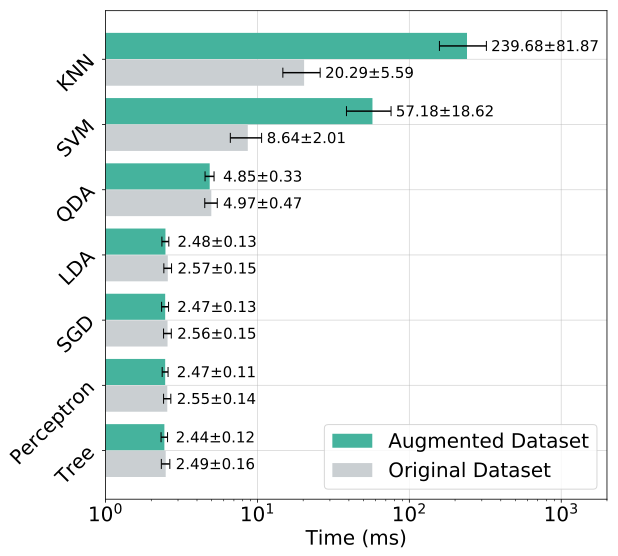

In [47]:
# corAumentado   = "#d27979"
# corOriginal    = "#4da6ff"
# corAumentado   = "tab:green"
# corOriginal    = "tab:grey"
# corAumentado   = None
# corOriginal    = None
corAumentado   = "#45B39D"
corOriginal    = "#CACFD2"
ajusteBarra    = 0.41
passo          = 2
ajusteTexto    = 0.16
fonteTexto     = 15

plt.barh(6*passo+ajusteBarra, KNNAumentado[0], color=corAumentado, label="Augmented Dataset")
plt.barh(6*passo-ajusteBarra, KNNOriginal[0], color=corOriginal, label="Original Dataset")
plt.barh(5*passo+ajusteBarra, SVMAumentado[0], color=corAumentado)
plt.barh(5*passo-ajusteBarra, SVMOriginal[0], color=corOriginal)
plt.barh(4*passo+ajusteBarra, QDAAumentado[0], color=corAumentado)
plt.barh(4*passo-ajusteBarra, QDAOriginal[0], color=corOriginal)
plt.barh(3*passo+ajusteBarra, LDAAumentado[0], color=corAumentado)
plt.barh(3*passo-ajusteBarra, LDAOriginal[0], color=corOriginal)
plt.barh(2*passo+ajusteBarra, SGDAumentado[0], color=corAumentado)
plt.barh(2*passo-ajusteBarra, SGDOriginal[0], color=corOriginal)
plt.barh(1*passo+ajusteBarra, PerceptronAumentado[0], color=corAumentado)
plt.barh(1*passo-ajusteBarra, PerceptronOriginal[0], color=corOriginal)
plt.barh(0*passo+ajusteBarra, TreeAumentado[0], color=corAumentado)
plt.barh(0*passo-ajusteBarra, TreeOriginal[0], color=corOriginal)

plt.errorbar(KNNAumentado[0], 6*passo+ajusteBarra, xerr=KNNAumentado[1], capsize=5, color="black")
plt.errorbar(KNNOriginal[0], 6*passo-ajusteBarra, xerr=KNNOriginal[1], capsize=5, color="black")
plt.errorbar(SVMAumentado[0], 5*passo+ajusteBarra, xerr=SVMAumentado[1], capsize=5, color="black")
plt.errorbar(SVMOriginal[0], 5*passo-ajusteBarra, xerr=SVMOriginal[1], capsize=5, color="black")
plt.errorbar(QDAAumentado[0], 4*passo+ajusteBarra, xerr=QDAAumentado[1], capsize=5, color="black")
plt.errorbar(QDAOriginal[0], 4*passo-ajusteBarra, xerr=QDAOriginal[1], capsize=5, color="black")
plt.errorbar(LDAAumentado[0], 3*passo+ajusteBarra, xerr=LDAAumentado[1], capsize=5, color="black")
plt.errorbar(LDAOriginal[0], 3*passo-ajusteBarra, xerr=LDAOriginal[1], capsize=5, color="black")
plt.errorbar(SGDAumentado[0], 2*passo+ajusteBarra, xerr=SGDAumentado[1], capsize=5, color="black")
plt.errorbar(SGDOriginal[0], 2*passo-ajusteBarra, xerr=SGDOriginal[1], capsize=5, color="black")
plt.errorbar(PerceptronAumentado[0], 1*passo+ajusteBarra, xerr=PerceptronAumentado[1], capsize=5, color="black")
plt.errorbar(PerceptronOriginal[0], 1*passo-ajusteBarra, xerr=PerceptronOriginal[1], capsize=5, color="black")
plt.errorbar(TreeAumentado[0], 0*passo+ajusteBarra, xerr=TreeAumentado[1], capsize=5, color="black")
plt.errorbar(TreeOriginal[0], 0*passo-ajusteBarra, xerr=TreeOriginal[1], capsize=5, color="black")

bordaTexto = 0.1
plt.text(KNNAumentado[0]+KNNAumentado[1]+bordaTexto*KNNAumentado[0], 6*passo+ajusteBarra-ajusteTexto, str(KNNAumentado[0])+"±"+str(KNNAumentado[1]), fontsize=fonteTexto)
plt.text(KNNOriginal[0]+KNNOriginal[1]+bordaTexto*KNNOriginal[0], 6*passo-ajusteBarra-ajusteTexto, str(KNNOriginal[0])+"±"+str(KNNOriginal[1]), fontsize=fonteTexto)
plt.text(SVMAumentado[0]+SVMAumentado[1]+bordaTexto*SVMAumentado[0], 5*passo+ajusteBarra-ajusteTexto, str(SVMAumentado[0])+"±"+str(SVMAumentado[1]), fontsize=fonteTexto)
plt.text(SVMOriginal[0]+SVMOriginal[1]+bordaTexto*SVMOriginal[0], 5*passo-ajusteBarra-ajusteTexto, str(SVMOriginal[0])+"±"+str(SVMOriginal[1]), fontsize=fonteTexto)
plt.text(QDAOriginal[0]+QDAOriginal[1]+bordaTexto*QDAOriginal[0], 4*passo+ajusteBarra-ajusteTexto, str(QDAAumentado[0])+"±"+str(QDAAumentado[1]), fontsize=fonteTexto)
plt.text(QDAOriginal[0]+QDAOriginal[1]+bordaTexto*QDAOriginal[0], 4*passo-ajusteBarra-ajusteTexto, str(QDAOriginal[0])+"±"+str(QDAOriginal[1]), fontsize=fonteTexto)
plt.text(LDAOriginal[0]+LDAOriginal[1]+bordaTexto*LDAOriginal[0], 3*passo+ajusteBarra-ajusteTexto, str(LDAAumentado[0])+"±"+str(LDAAumentado[1]), fontsize=fonteTexto)
plt.text(LDAOriginal[0]+LDAOriginal[1]+bordaTexto*LDAOriginal[0], 3*passo-ajusteBarra-ajusteTexto, str(LDAOriginal[0])+"±"+str(LDAOriginal[1]), fontsize=fonteTexto)
plt.text(SGDOriginal[0]+SGDOriginal[1]+bordaTexto*SGDOriginal[0], 2*passo+ajusteBarra-ajusteTexto, str(SGDAumentado[0])+"±"+str(SGDAumentado[1]), fontsize=fonteTexto)
plt.text(SGDOriginal[0]+SGDOriginal[1]+bordaTexto*SGDOriginal[0], 2*passo-ajusteBarra-ajusteTexto, str(SGDOriginal[0])+"±"+str(SGDOriginal[1]), fontsize=fonteTexto)
plt.text(PerceptronOriginal[0]+PerceptronOriginal[1]+bordaTexto*PerceptronOriginal[0], 1*passo+ajusteBarra-ajusteTexto, str(PerceptronAumentado[0])+"±"+str(PerceptronAumentado[1]), fontsize=fonteTexto)
plt.text(PerceptronOriginal[0]+PerceptronOriginal[1]+bordaTexto*PerceptronOriginal[0], 1*passo-ajusteBarra-ajusteTexto, str(PerceptronOriginal[0])+"±"+str(PerceptronOriginal[1]), fontsize=fonteTexto)
plt.text(TreeOriginal[0]+TreeOriginal[1]+bordaTexto*TreeOriginal[0], 0*passo+ajusteBarra-ajusteTexto, str(TreeAumentado[0])+"±"+str(TreeAumentado[1]), fontsize=fonteTexto)
plt.text(TreeOriginal[0]+TreeOriginal[1]+bordaTexto*TreeOriginal[0], 0*passo-ajusteBarra-ajusteTexto, str(TreeOriginal[0])+"±"+str(TreeOriginal[1]), fontsize=fonteTexto)

plt.legend()
plt.xlabel("Time (ms)")
plt.xscale("log")
plt.yticks([6*passo,5*passo,4*passo,3*passo,2*passo,1*passo,0*passo], ["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"], rotation=45)
plt.grid(alpha=0.5)
plt.xlim(1, 2000)

plt.savefig(caminhoSalvar+"tempoTodosClassificadoresSemBF.pdf", format='pdf', bbox_inches = 'tight')
plt.show()